In [54]:
%matplotlib inline 
import numpy as np                       
from matplotlib import pyplot as plt      
import time, sys                   

### Постановка и сеточные параметры

Рассмотрим задачу об эволюции ступеньки. Численное решается уравнение переноса с коэффициентом переноса $c$.

In [55]:
nx = 41  # количество узлов по пространству
dx = 2 / (nx-1) # шаг по пространству
nt = 25    # количество узлов по времени
dt = .025  # шаг по времени
T = dt*(nt-1)
c = 1      # скорость распространения возмущения (коэффициент переноса)
x_mesh = np.linspace(0, 2, nx) #сетка по пространству
r = c*dt/dx # число Куранта
print('r = ', r)
print('T = ', T)

r =  0.5
T =  0.6000000000000001


#### Начальные условия

Зададим $u(x, 0) = 2$ при $x \in [0.5, 1]$ и $u(x, 0) = 1$ иначе во всей расчетной области. Такая функция называется "ступенька". 

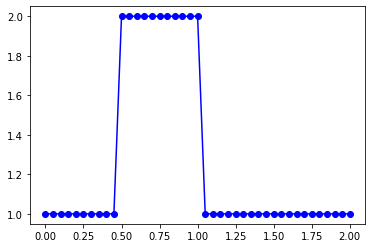

In [56]:
u_init = np.ones(nx)      
u_init[int(.5 / dx):int(1 / dx + 1)] = 2  
plt.plot(x_mesh, u_init, '-bo')

#### Точное решение

К моменту времени T ступенька просто сдвинется вправо

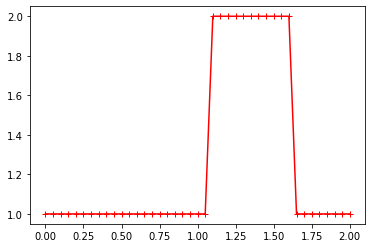

In [57]:
u_exact = np.ones(nx)      
u_exact[int((.5+c*T) / dx):int((1+c*T) / dx + 1)] = 2  
plt.plot(x_mesh, u_exact, '-r+')

### Численное решение

#### Часть 1. Явный левый уголок
Сначала примените схему Явный левый уголок (Upwind scheme). Провести расчеты для $nx = 41; 81; 121$. Построить графики решения

In [58]:
un = np.ones(nx) # инициализация вспомогательного массива для хранения
                 # данных с предыдущего шага
u = u_init.copy()
for n in range(1, nt):  # шагаем по времени
    un = u.copy() # заполняем данными с предыдущего шага
    for i in range(1, nx): # шагаем по пространству
        u[i] = un[i] - r*(un[i] - un[i-1])

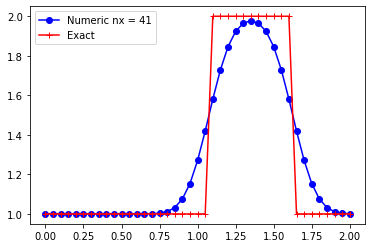

In [59]:
plt.plot(x_mesh, u, '-bo', label = 'Numeric nx = ' + str(nx))
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()

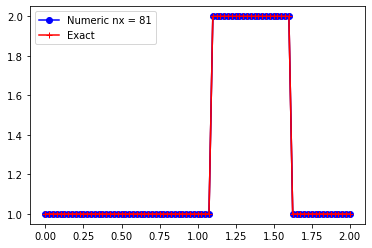

In [63]:
nx = 81  # количество узлов по пространству
dx = 2 / (nx-1) # шаг по пространству
nt = 25    # количество узлов по времени
dt = .025  # шаг по времени
T = dt*(nt-1)
c = 1      # скорость распространения возмущения (коэффициент переноса)
x_mesh = np.linspace(0, 2, nx) #сетка по пространству
r = c*dt/dx # число Куранта

u_init = np.ones(nx)      
u_init[int(.5 / dx):int(1 / dx + 1)] = 2  
u_exact = np.ones(nx)      
u_exact[int((.5+c*T) / dx):int((1+c*T) / dx + 1)] = 2  
plt.plot(x_mesh, u_exact, '-r+')
un = np.ones(nx) # инициализация вспомогательного массива для хранения
                 # данных с предыдущего шага
u = u_init.copy()
for n in range(1, nt):  # шагаем по времени
    un = u.copy() # заполняем данными с предыдущего шага
    for i in range(1, nx): # шагаем по пространству
        u[i] = un[i] - r*(un[i] - un[i-1])
plt.plot(x_mesh, u, '-bo', label = 'Numeric nx = ' + str(nx))
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()

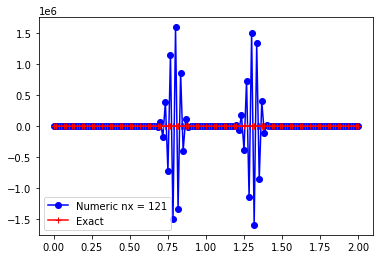

In [64]:
nx = 121  # количество узлов по пространству
dx = 2 / (nx-1) # шаг по пространству
nt = 25    # количество узлов по времени
dt = .025  # шаг по времени
T = dt*(nt-1)
c = 1      # скорость распространения возмущения (коэффициент переноса)
x_mesh = np.linspace(0, 2, nx) #сетка по пространству
r = c*dt/dx # число Куранта
u_init = np.ones(nx)      
u_init[int(.5 / dx):int(1 / dx + 1)] = 2  

u_exact = np.ones(nx)      
u_exact[int((.5+c*T) / dx):int((1+c*T) / dx + 1)] = 2  
plt.plot(x_mesh, u_exact, '-r+')
un = np.ones(nx) # инициализация вспомогательного массива для хранения
                 # данных с предыдущего шага
u = u_init.copy()
for n in range(1, nt):  # шагаем по времени
    un = u.copy() # заполняем данными с предыдущего шага
    for i in range(1, nx): # шагаем по пространству
        u[i] = un[i] - r*(un[i] - un[i-1])
plt.plot(x_mesh, u, '-bo', label = 'Numeric nx = ' + str(nx))
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()

0. Какой у схемы порядок аппроксимации?
- Первый, так как это явный левый уголок, мы явно вывели это на семинаре. Перепишем вывод: 
$\frac{u_j^{n+1} - u_j^n}{\tau} = \frac{a \cdot (u_j^n-u_{j-1}^n)}{h}$

$\frac{u(x, t+\tau) - u(x,t)}{\tau} = \frac{a}{h}(u(x,t) - u(x-h, t))+ \frac{r}{\tau}$

$r = u(x, t+\tau) - u(x,t) - \frac{a\tau}{h}(u(x,t) - u(x-h, t)) = u(x, t) + o(\tau) - u(x,t) - \frac{a\tau}{h}(u(x,t) - u(x,t) + o(h)) = o(\tau+ h)$ - получаем первый порядок. Действительно первый: https://studfile.net/preview/6796433/
1. Удалось ли получить решение? Почему?
Зависит от значения nx.
При nx = 41 слишком низкая точность.
При nx = 81, так как это число входит в область устойчивости по условию КФЛ:  $|\frac{a\triangle t}{\triangle x}| \leq 1$
А nx = 121 резонирует.

2. Сколько граничных условий и где нужно поставить в этой задаче?
Одно условие и слева
3. Почему в задаче явно нигде не инициализируются граничные условия?
Потому, что слева оно всегда 0 и постоянно в течение цикла копируется дальше. Можно сказать, что оно неявно инициализированно.
4. Почему в цикле по пространству индексация с 1? Потому, что для вычисления берётся предудыщее значение по пространству, а минимальное значение индекса равно 0. Значит вычислить можно элементы только начиная с первого.
5. Можно ли решить задачу схемой Явный правый уголок?
Нет, так как для устойчивости явного правого уголка необходимо с меньшее 0. Здесь оно равно 1, что явно больше 0.
6. Почему при решении на 41 узле решение размывается, а на 81 узле нет?
7. Объясните причину размытия решения.
Дисперсия размывает решения на nx = 41, так как в [1] сказано, что со временем они разделяются. Для $nx = 81$ число куранта  1, поэтому групповая скорость решения метода совпадает с групповой скоростью точного.



Для ответа на шестой вопрос может быть полезна книга [1], c.71

1. Зализняк В.Е. Основы вычислительной физики. Часть 1. Введение в конечно-разностные методы

#### Часть 2. Схема МакКормака 

Теперь примените схему МакКормака (MacCormack method). Провести расчеты для $nx = 41; 81; 121$. Построить графики решения

In [75]:

un = np.ones(nx) # инициализация вспомогательного массива для хранения данных с предыдущего шага
# TODO: создадим еще вспомогательных структур?
vspomogat = np.ones(nx)


u = u_init.copy()
for n in range(1, nt): 
    un = u.copy() 
    
    for i in range(1, nx-1): # Ось просранства, поэтому до nx -1 
        vspomogat[i] =   (1 + r)*un[i] - r*un[i+1]
    # TODO: corrector
    for i in range(1, nx):
        u[i] = (u[i]+ (1 - r)*vspomogat[i] - r*vspomogat[i-1])/2

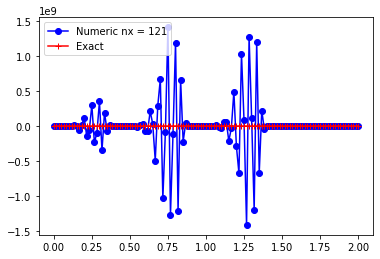

In [76]:
plt.plot(x_mesh, u, '-bo', label = 'Numeric nx = ' + str(nx))
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()

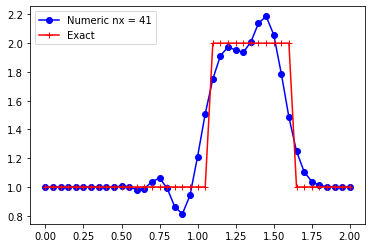

In [70]:
nx = 41  # количество узлов по пространству
dx = 2 / (nx-1) # шаг по пространству
nt = 25    # количество узлов по времени
dt = .025  # шаг по времени
T = dt*(nt-1)
c = 1      # скорость распространения возмущения (коэффициент переноса)
x_mesh = np.linspace(0, 2, nx) #сетка по пространству
r = c*dt/dx # число Куранта

u_init = np.ones(nx)      
u_init[int(.5 / dx):int(1 / dx + 1)] = 2  
u_exact = np.ones(nx)      
u_exact[int((.5+c*T) / dx):int((1+c*T) / dx + 1)] = 2 

un = np.ones(nx) # инициализация вспомогательного массива для хранения данных с предыдущего шага
# TODO: создадим еще вспомогательных структур?
vspomogat = np.ones(nx)


u = u_init.copy()
for n in range(1, nt): 
    un = u.copy() 
    
    for i in range(1, nx-1): # Ось просранства, поэтому до nx -1 
        vspomogat[i] = 0 - r*un[i+1] + (1 + r)*un[i]
    # TODO: corrector
    for i in range(1, nx):
        u[i] = (u[i]+ (1 - r)*vspomogat[i] + r*vspomogat[i-1])/2
arr = [x_mesh, u]
plt.plot(arr[0], arr[1], '-bo', label = 'Numeric nx = 41')
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()
plt.show()


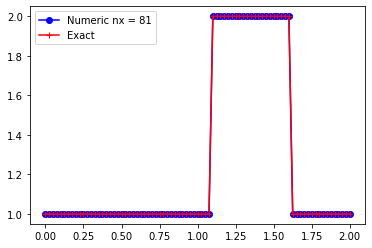

In [73]:
nx = 81  # количество узлов по пространству
dx = 2 / (nx-1) # шаг по пространству
nt = 25    # количество узлов по времени
dt = .025  # шаг по времени
T = dt*(nt-1)
c = 1      # скорость распространения возмущения (коэффициент переноса)
x_mesh = np.linspace(0, 2, nx) #сетка по пространству
r = c*dt/dx # число Куранта

u_init = np.ones(nx)      
u_init[int(.5 / dx):int(1 / dx + 1)] = 2  

u_exact = np.ones(nx)      
u_exact[int((.5+c*T) / dx):int((1+c*T) / dx + 1)] = 2  
un = np.ones(nx) # инициализация вспомогательного массива для хранения данных с предыдущего шага
# TODO: создадим еще вспомогательных структур?
vspomogat = np.ones(nx)


u = u_init.copy()
for n in range(1, nt): 
    un = u.copy() 
    
    for i in range(1, nx-1): # Ось просранства, поэтому до nx -1 
        vspomogat[i] = 0 - r*un[i+1] + (1 + r)*un[i]
    # TODO: corrector
    for i in range(1, nx):
        u[i] = (u[i]+ (1 - r)*vspomogat[i] + r*vspomogat[i-1])/2
arr = [x_mesh, u]
plt.plot(arr[0], arr[1], '-bo', label = 'Numeric nx = 81')
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()
plt.show()


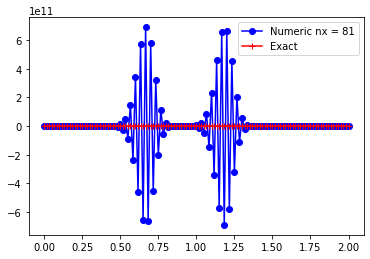

In [74]:
nx = 121  # количество узлов по пространству
dx = 2 / (nx-1) # шаг по пространству
nt = 25    # количество узлов по времени
dt = .025  # шаг по времени
T = dt*(nt-1)
c = 1      # скорость распространения возмущения (коэффициент переноса)
x_mesh = np.linspace(0, 2, nx) #сетка по пространству
r = c*dt/dx # число Куранта

u_init = np.ones(nx)      
u_init[int(.5 / dx):int(1 / dx + 1)] = 2  

u_exact = np.ones(nx)      
u_exact[int((.5+c*T) / dx):int((1+c*T) / dx + 1)] = 2  
un = np.ones(nx) # инициализация вспомогательного массива для хранения данных с предыдущего шага
# TODO: создадим еще вспомогательных структур?
vspomogat = np.ones(nx)


u = u_init.copy()
for n in range(1, nt): 
    un = u.copy() 
    
    for i in range(1, nx-1): # Ось просранства, поэтому до nx -1 
        vspomogat[i] = 0 - r*un[i+1] + (1 + r)*un[i]
    # TODO: corrector
    for i in range(1, nx):
        u[i] = (u[i]+ (1 - r)*vspomogat[i] + r*vspomogat[i-1])/2
arr = [x_mesh, u]
plt.plot(arr[0], arr[1], '-bo', label = 'Numeric nx = 81')
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()
plt.show()

0. Какой у схемы порядок аппроксимации?
Второй порядок, согласно https://ftf.tsu.ru/wp-content/uploads/L.L.-Minkov-E.R.-SHrager-Osnovnye-podhody-k-chislennomu-resheniyu-odnomernyh-uravnenij-teploprovodnosti.pdf  на 33 странице
1. Удалось ли получить решение? Почему?
Удалост, так как при nx = 81, число курранта равно 1, и поэтому оно устойчиво

2. Почему при решении на 41 узле решение осциллирует, а на 81 узле нет?
Потому что при nx = 41 дисперсия разделяет гармоники по скоростям, поэтому они разделяются.
3. Объясните причину осцилляций.
4. Совпадает ли схема со схемой Лакса-Вендроффа для данной задачи (Lax–Wendroff method)? Да
Страница 33 https://ftf.tsu.ru/wp-content/uploads/L.L.-Minkov-E.R.-SHrager-Osnovnye-podhody-k-chislennomu-resheniyu-odnomernyh-uravnenij-teploprovodnosti.pdf 

#### Часть 3. Монотонная схема высокого порядка

1. Можно ли построить линейную монотонную по Годунову схему с порядком выше первого? Почему?
Нет, так как https://www.ece.uvic.ca/~bctill/papers/numacoust/Godunov_1959.pdf на странице 7.  Идея доказательства лежит в том, что при предположении, что схема имеет второй порядок точности, теряется условие монотонности для схемы. Поэтому данное предположение неверно.
2. Постройте монотонную схему порядка выше первого и примените к решению задачи из предыдущих частей.


https://mipt.ru/education/chair/computational_mathematics/upload/f9c/Laba_1_theory-arphsgar1js.pdf стр.9

схема: $u_m^{n+1} = a_{-2}u_{m-2}^n+a_{-1}u_{m-1}^n + a_{0}u_{m}^n + a_{1}u_{m+1}^n$


Списываем условия аппроксимации 3 порядка: 

$$a_{-2}+a_{-1}+a_0+a_1=1; 8a_{-2}+a_{-1}-a_1=r^3; 2a_{-2}+a_{-1}-a_1=r; 4a_{-2}+a_{-1}+a_1=r^2$$



Выводим условия на а

$$a_{-2}=\frac{r^3-r}{6} ; a_{-1}=\frac{2r+r^2-r^3}{2}; a_{0} = \frac{2-r-2r^2;+r^3}{2}; a_1=\frac{-2r+3r^2-r^3}{6}$$

41


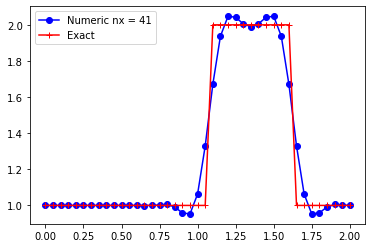

In [81]:

nx =41
dx = 2 / (nx-1) # шаг по пространству
nt = 25    # количество узлов по времени
dt = .025  # шаг по времени
T = dt*(nt-1)
c = 1      # скорость распространения возмущения (коэффициент переноса)
x_mesh = np.linspace(0, 2, nx) #сетка по пространству
r = c*dt/dx # число Куранта
u_exact = np.ones(nx)      
u_exact[int((.5+c*T) / dx):int((1+c*T) / dx + 1)] = 2 

u_init = np.ones(nx)      
u_init[int(.5 / dx):int(1 / dx + 1)] = 2 
    
un = np.ones(nx) # инициализация вспомогательного массива для хранения
                 # данных с предыдущего шага 
u = u_init.copy()


for n in range(1, nt):  # шагаем по времени
    un = u.copy() # заполняем данными с предыдущего шага
    for i in range(2, nx-1): # шагаем по пространству
        u[i] = ((r**3-r) / 6)*un[i-2] + ((2*r+r**2-r**3) / 2)*un[i-1] + ((2-r-2*r**2+r**3) / 2)*un[i] + ((-2*r+3*r**2-r**3) / 6)*un[i+1]
print(nx)
arr = [x_mesh, u]
    
plt.plot(arr[0], arr[1], '-bo', label = 'Numeric nx = 41')
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()
plt.show()    

81


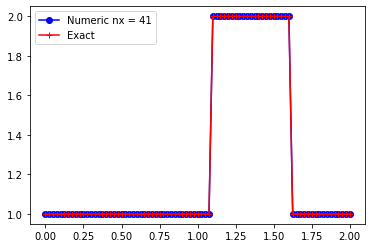

In [82]:

nx =81
dx = 2 / (nx-1) # шаг по пространству
nt = 25    # количество узлов по времени
dt = .025  # шаг по времени
T = dt*(nt-1)
c = 1      # скорость распространения возмущения (коэффициент переноса)
x_mesh = np.linspace(0, 2, nx) #сетка по пространству
r = c*dt/dx # число Куранта
u_exact = np.ones(nx)      
u_exact[int((.5+c*T) / dx):int((1+c*T) / dx + 1)] = 2 

u_init = np.ones(nx)      
u_init[int(.5 / dx):int(1 / dx + 1)] = 2 
    
un = np.ones(nx) # инициализация вспомогательного массива для хранения
                 # данных с предыдущего шага 
u = u_init.copy()


for n in range(1, nt):  # шагаем по времени
    un = u.copy() # заполняем данными с предыдущего шага
    for i in range(2, nx-1): # шагаем по пространству
        u[i] = ((r**3-r) / 6)*un[i-2] + ((2*r+r**2-r**3) / 2)*un[i-1] + ((2-r-2*r**2+r**3) / 2)*un[i] + ((-2*r+3*r**2-r**3) / 6)*un[i+1]
print(nx)
arr = [x_mesh, u]
    
plt.plot(arr[0], arr[1], '-bo', label = 'Numeric nx = 41')
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()
plt.show()    

121


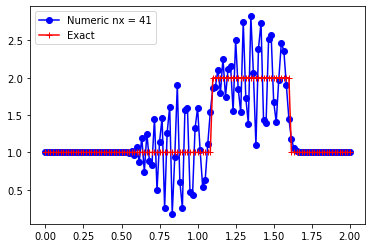

In [83]:

nx =121
dx = 2 / (nx-1) # шаг по пространству
nt = 25    # количество узлов по времени
dt = .025  # шаг по времени
T = dt*(nt-1)
c = 1      # скорость распространения возмущения (коэффициент переноса)
x_mesh = np.linspace(0, 2, nx) #сетка по пространству
r = c*dt/dx # число Куранта
u_exact = np.ones(nx)      
u_exact[int((.5+c*T) / dx):int((1+c*T) / dx + 1)] = 2 

u_init = np.ones(nx)      
u_init[int(.5 / dx):int(1 / dx + 1)] = 2 
    
un = np.ones(nx) # инициализация вспомогательного массива для хранения
                 # данных с предыдущего шага 
u = u_init.copy()


for n in range(1, nt):  # шагаем по времени
    un = u.copy() # заполняем данными с предыдущего шага
    for i in range(2, nx-1): # шагаем по пространству
        u[i] = ((r**3-r) / 6)*un[i-2] + ((2*r+r**2-r**3) / 2)*un[i-1] + ((2-r-2*r**2+r**3) / 2)*un[i] + ((-2*r+3*r**2-r**3) / 6)*un[i+1]
print(nx)
arr = [x_mesh, u]
    
plt.plot(arr[0], arr[1], '-bo', label = 'Numeric nx = 41')
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()
plt.show()    